# Time Series Data

In [28]:
# Import packages

!pip install matplotlib==3.1.3
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

! pip install --upgrade earthpy
import earthpy as et

# handle date time conversions between pandas and matplotlib

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings 
warnings.filterwarnings('ignore')

#Adjust font size aand style of all plots in notebook with seaborn 
sns.set(font_scale=1.5, style="whitegrid")

print('Libraries downloaded')

     |████████████████████████████████| 13.1 MB 13.5 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
Libraries downloaded


In [42]:
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")


# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)

print(boulder_precip_2003_2013.head()) # Got an attribute Error when I did not wrap in print statement

       STATION     STATION_NAME  ELEVATION  LATITUDE  LONGITUDE  \
0  COOP:050843  BOULDER 2 CO US     1650.5  40.03389 -105.28111   
1  COOP:050843  BOULDER 2 CO US     1650.5  40.03389 -105.28111   
2  COOP:050843  BOULDER 2 CO US     1650.5  40.03389 -105.28111   
3  COOP:050843  BOULDER 2 CO US     1650.5  40.03389 -105.28111   
4  COOP:050843  BOULDER 2 CO US     1650.5  40.03389 -105.28111   

             DATE  HPCP Measurement Flag Quality Flag  
0  20030101 01:00   0.0                g               
1  20030201 01:00   0.0                g               
2  20030202 19:00   0.2                                
3  20030202 22:00   0.1                                
4  20030203 02:00   0.1                                


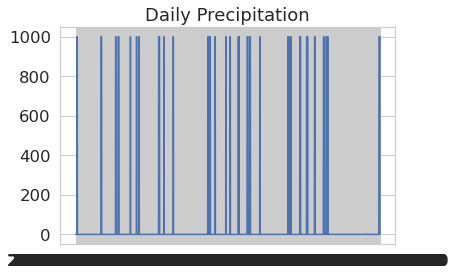

In [44]:
#boulder_precip_2003_2013.plot(x="DATE",
#                              y="HPCP",
#                              title="Daily Precipitation")
plt.plot(boulder_precip_2003_2013['DATE'],
         boulder_precip_2003_2013['HPCP'])
plt.title('Daily Precipitation')
plt.show()

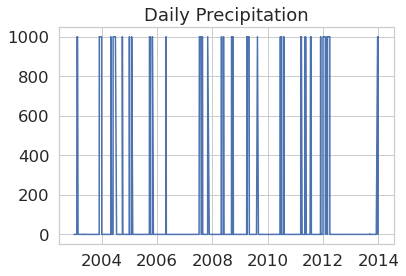

In [49]:
# Better way: Set Date as index
df = boulder_precip_2003_2013 # I am lazy
df['DATE'] = pd.to_datetime(df['DATE'], yearfirst=True) # confirm it is a datetime series
df = df.set_index(df['DATE']) # set index

plt.plot(df['HPCP']) # Not a Datetime )
plt.title('Daily Precipitation')
plt.show()

In [50]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [51]:
boulder_precip_2003_2013.dtypes

STATION                     object
STATION_NAME                object
ELEVATION                  float64
LATITUDE                   float64
LONGITUDE                  float64
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

In [52]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
print(boulder_precip_2003_2013.head()) 

                         STATION     STATION_NAME  ELEVATION  LATITUDE  \
DATE                                                                     
2003-01-01 01:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
2003-02-01 01:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
2003-02-02 19:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
2003-02-02 22:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
2003-02-03 02:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   

                     LONGITUDE  HPCP Measurement Flag Quality Flag  
DATE                                                                
2003-01-01 01:00:00 -105.28111   0.0                g               
2003-02-01 01:00:00 -105.28111   0.0                g               
2003-02-02 19:00:00 -105.28111   0.2                                
2003-02-02 22:00:00 -105.28111   0.1                                
2003-02-03 02:00:00 -105.28111   0.1                               

In [54]:
# View summary statistics == Notice the DATE column is not included
print(boulder_precip_2003_2013.describe())

       ELEVATION     LATITUDE    LONGITUDE         HPCP
count     1840.0  1840.000000  1840.000000  1746.000000
mean      1650.5    40.033851  -105.281106     0.111856
std          0.0     0.000045     0.000005     0.093222
min       1650.5    40.033800  -105.281110     0.000000
25%       1650.5    40.033800  -105.281110     0.100000
50%       1650.5    40.033890  -105.281110     0.100000
75%       1650.5    40.033890  -105.281100     0.100000
max       1650.5    40.033890  -105.281100     2.200000


In [55]:
# Where is the date column
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [56]:
# View the index for your data frame
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [57]:
print(boulder_precip_2003_2013.reset_index())

                    DATE      STATION     STATION_NAME  ELEVATION  LATITUDE  \
0    2003-01-01 01:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
1    2003-02-01 01:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
2    2003-02-02 19:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
3    2003-02-02 22:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
4    2003-02-03 02:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03389   
...                  ...          ...              ...        ...       ...   
1835 2013-12-22 01:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03380   
1836 2013-12-23 00:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03380   
1837 2013-12-23 02:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03380   
1838 2013-12-29 01:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03380   
1839 2013-12-31 00:00:00  COOP:050843  BOULDER 2 CO US     1650.5  40.03380   

      LONGITUDE  HPCP Measurement Flag Quality Flag

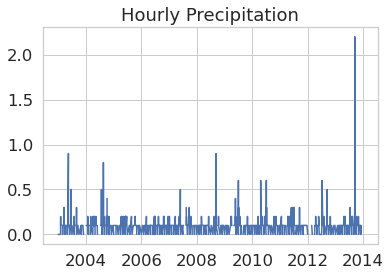

In [60]:
df = boulder_precip_2003_2013 # I am lazy
#df['DATE'] = pd.to_datetime(df['DATE'], yearfirst=True) # confirm it is a datetime series
#df = df.set_index(df['DATE']) # set index

plt.plot(df['HPCP']) # Not a Datetime )
plt.title('Hourly Precipitation')
plt.show()

In [ ]:
precip_2005=